<a href="https://colab.research.google.com/github/Vasu456/ClusterView-/blob/main/Copy_of_Cluster_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules



In [ ]:
!pip install umap-learn

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install forcelayout
!pip install pyDRMetrics

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import tarfile
  

# Download and extract the file
url = "https://src.fedoraproject.org/lookaside/pkgs/metis/metis-5.1.0.tar.gz/5465e67079419a69e0116de24fce58fe//metis-5.1.0.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

# Change working directory
%cd metis-5.1.0

!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so
!pip3 install metis-python

import metispy as metis

/content/metis-5.1.0
rm -rf build/Linux-x86_64
mkdir -p build/Linux-x86_64
cd build/Linux-x86_64 && cmake /content/metis-5.1.0 -DCMAKE_VERBOSE_MAKEFILE=1 -DGKLIB_PATH=/content/metis-5.1.0/GKlib -DCMAKE_INSTALL_PREFIX=/root/.local/ -DSHARED=1
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX com

In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import forcelayout as fl
from sklearn.preprocessing import MinMaxScaler
from scipy import spatial

In [ ]:
import umap.distances as distances
import umap.umap_ as umap
import networkx as nkx

from pyDRMetrics.pyDRMetrics import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files=['bank.csv','cifar.csv','cnae.csv','coil20.csv','epileptic.csv','fashion_mnist.csv','fmd.csv','har.csv','hatespeech.csv','hiva.csv','imdb.csv','orl.csv','secom.csv','seismic.csv','sentiment.csv','sms.csv','spambase.csv','svhn.csv']

In [761]:
i=4

In [762]:
dataset_path = '/content/drive/MyDrive/input_data/'+files[i] 
data_ = pd.read_csv(dataset_path)

In [763]:
params = [{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.1, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.1, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0}]


In [764]:
classes = [2,5,9,20,4,10,10,6,3,2,2,3,2,2,2,2,2,5]

In [765]:
data_ = StandardScaler().fit_transform(data_)

In [766]:
scaler = MinMaxScaler()
data_ = scaler.fit_transform(data_.astype('float32'))

In [767]:
data_ = np.array(data_)

In [768]:
reducer = umap.UMAP(**params[i])
reducer.fit(data_)

UMAP(min_dist=0.001, n_neighbors=5, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [769]:
graph = reducer.graph_
ngraph = nkx.Graph(graph)

In [770]:
(edgecuts, parts) = metis.part_graph(ngraph, nparts=classes[i])

In [771]:
embedding = reducer.embedding_

In [772]:
embedding = reducer.embedding_
embedding_scaled =  scaler.fit_transform(embedding.astype('float32'))

In [773]:
def calculateClusterCenter(data,parts):
  centre={}
  for i in range(len(parts)):
    if parts[i] in centre:
      centre[parts[i]]+=data[i]
    else:
      centre[parts[i]]=data[i]


  for j in centre:
    try:
      centre[j]/=parts.count(j)
    except:
      centre[j]=centre[j]/parts.count(j)
  
  return centre

centre = calculateClusterCenter(data_,parts)


In [774]:
embedding = reducer.embedding_

In [775]:
print(embedding)

[[ 9.020177   -0.5091447 ]
 [10.527459    2.6412284 ]
 [10.028526   -0.60283333]
 ...
 [10.7139435   2.0155292 ]
 [ 5.770742   -1.1105998 ]
 [ 4.9594264   2.8994002 ]]


In [776]:
embedding = reducer.embedding_
embedding_scaled =  scaler.fit_transform(embedding.astype('float32'))

In [777]:
def normalize(D):
    scaler = MinMaxScaler()
    D = scaler.fit_transform(D.reshape((-1, 1)))
    D = D.squeeze()
    return D

def normalized_stress(D_high, D_low):
    return (np.sum((D_high - D_low)**2) / np.sum(D_high**2))

In [778]:
def stress1(origData, projData):
  D_low = spatial.distance.pdist(projData, 'euclidean')
  D_high = spatial.distance.pdist(origData, 'euclidean')
  D_low = normalize(D_low)
  D_high = normalize(D_high)
  return normalized_stress(D_high, D_low)

In [779]:
def stress2(origData, projData):
  D_low = spatial.distance.pdist(projData, 'euclidean')
  D_high = spatial.distance.pdist(origData, 'euclidean')
  #D_low = normalize(D_low)
  #D_high = normalize(D_high)
  return normalized_stress(D_high, D_low)

In [780]:
def stress(originalData, projectedData):
  squarePairDistance=0
  numerator=0
  length = len(originalData)
  for i in range(length):
    for j in range(i+1,length):
          original = distances.euclidean(originalData[i],originalData[j])
          projected = distances.euclidean(projectedData[i], projectedData[j])
          squareDifference = (original-projected)**2
          numerator+=squareDifference
          squarePairDistance += original**2

  stress = numerator/squarePairDistance

  return stress

In [781]:
def selectCluster(parts, projectedPoints, cluster):
  clusterPoints=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      clusterPoints.append(list(projectedPoints[i]))
  return np.array(clusterPoints)

In [782]:
def translate(cluster,axis, distance):
  toAdd = [0,0]
  toAdd[axis] = distance
  return cluster+toAdd

In [783]:
def changeCluster(parts, coordinates, projected, cluster):
  count=0
  newProjected=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      newProjected.append(coordinates[count])
      count+=1
    else:
      newProjected.append(projected[i])
  return newProjected

In [784]:
def forceDirectedCentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  layout = fl.draw_spring_layout(dataset=clusterCentres, algorithm=fl.SpringForce)

  print(layout.get_stress())

  forceDirectedPositions = layout.get_positions()

  return forceDirectedPositions

In [785]:
def PCACentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  pcaCoords = PCA(n_components=2).fit_transform(clusterCentres)

  return pcaCoords

In [786]:
def posDifference(highDimensionCentres, lowDimensionCentres, initializer):
  if initializer=="fdl":
    centreRepresentation = forceDirectedCentres(highDimensionCentres, parts)
  elif initializer=="pca":
    centreRepresentation = PCACentres(highDimensionCentres, parts)

  centre2d = np.array(lowDimensionCentres[0])
  for i in range(1,len(set(parts))):
    centre2d=np.vstack((centre2d, lowDimensionCentres[i]))

  return centreRepresentation - centre2d

In [787]:
def translateUsingDifference(difference, parts, embedding):
  newEmbedding = embedding 
  for i in range(len(difference)):
    x = selectCluster(parts, newEmbedding, i)
    translated = translate(x, 0, difference[i][0])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

    y = selectCluster(parts, newEmbedding, i)
    translated = translate(y, 1, difference[i][1])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

  return newEmbedding

0.04618868702506682


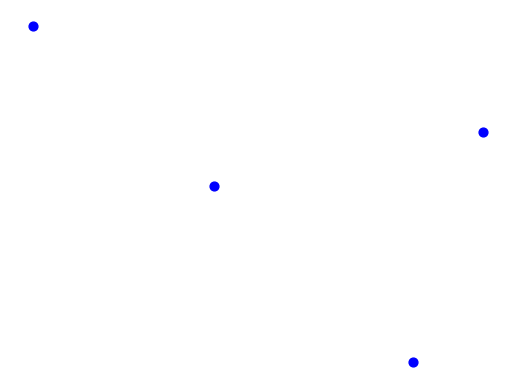

In [788]:
initialCentres = calculateClusterCenter(embedding_scaled,parts)
clusterCentres = np.array(centre.get(i, []))

differenceFDL = posDifference(centre, initialCentres, "fdl")

In [789]:
translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding_scaled)
print("Both scaled:" ,stress1(data_, embedding_scaled),',',stress1(data_,translatedEmbeddingFDL))
print("Stress not scaled:", stress2(data_, embedding_scaled),',',stress2(data_,translatedEmbeddingFDL))

Both scaled: 2.2402054948745564 , 0.6739832181879573
Stress not scaled: 0.5171183457357252 , 0.5769655348670707


In [790]:
'''for i in range(0,5):
  reducer = umap.UMAP(**params[0])
  reducer.fit(data_)
  graph = reducer.graph_
  ngraph = nkx.Graph(graph)
  (edgecuts, parts) = metis.part_graph(ngraph, nparts=classes[0])
  embedding = reducer.embedding_
  embedding_scaled =  scaler.fit_transform(embedding.astype('float32'))
  translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding_scaled)
  print("Both scaled:" ,stress1(data_, embedding_scaled),',',stress1(data_,translatedEmbeddingFDL))
  print("Stress not scaled:", stress2(data_, embedding_scaled),',',stress2(data_,translatedEmbeddingFDL))'''

'for i in range(0,5):\n  reducer = umap.UMAP(**params[0])\n  reducer.fit(data_)\n  graph = reducer.graph_\n  ngraph = nkx.Graph(graph)\n  (edgecuts, parts) = metis.part_graph(ngraph, nparts=classes[0])\n  embedding = reducer.embedding_\n  embedding_scaled =  scaler.fit_transform(embedding.astype(\'float32\'))\n  translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding_scaled)\n  print("Both scaled:" ,stress1(data_, embedding_scaled),\',\',stress1(data_,translatedEmbeddingFDL))\n  print("Stress not scaled:", stress2(data_, embedding_scaled),\',\',stress2(data_,translatedEmbeddingFDL))'

0.04334652671419404


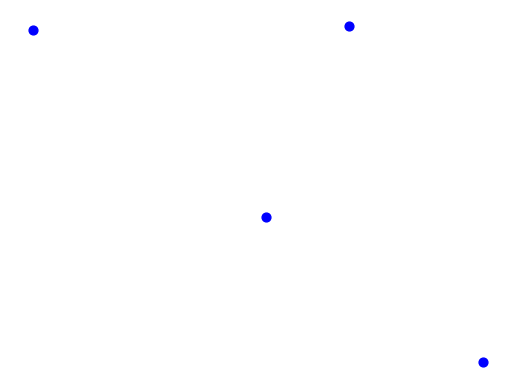

In [791]:
initialCentres = calculateClusterCenter(embedding,parts)
differenceFDL = posDifference(centre, initialCentres, "fdl")


In [792]:
translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding)
print("Embedding not scaled:", stress1(data_, embedding),',',stress1(data_,translatedEmbeddingFDL))
print("Both not scaled:", stress2(data_, embedding),',',stress2(data_,translatedEmbeddingFDL))

Embedding not scaled: 2.4339863624729126 , 0.5451474863175165
Both not scaled: 15.97633464805264 , 6.494044085647814
